In [239]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt

In [240]:
def read(file):
    data = pd.read_csv(file).values
    
    x = data[:, 1:]
    y = data[:, 0]
    
    return x, y

In [241]:
def scale(x):
    return x / 255

In [242]:
def insert_ones(x):
    return np.insert(x, obj = 0, values = 1, axis = 1)

In [243]:
def one_hot(arg):
    res = np.zeros((len(arg), 10))
    res[np.arange(arg.shape[0]), arg] = 1
    return res

In [244]:
def relu(x):
    return np.maximum(x, 0)

In [245]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

In [246]:
def acurracy(y_pred, y):
    y_pred = np.argmax(y_pred, axis=1)
    y = np.argmax(y, axis=1)
    ac = ((y_pred == y).sum() * 100) / y_pred.shape[0]
    return ac

In [247]:
def forward_prop(x, w1, w2, b1, b2):
    '''
    w1,w2 - weights for the layers
    b1,b2 - bias values
    
    
    z1,z2 - activation values for neurons in layers
    a1,a2 - output values for the neurons in layers
        
    '''
    
    z1 = np.dot(x, w1.transpose()) + b1
    a1 = relu(z1)
    
    z2 = np.dot(a1, w2.transpose()) + b2
    a2 = softmax(z2)

    return a1, a2

In [248]:
#error calculated using cross-entropy method 
def cross_entropy(y_pred, y):
    cost = - (1.0 / y.shape[0]) * np.sum(np.multiply(np.log(y_pred), y))
    return cost

In [249]:
def calcul_cost(a2, m, W1, W2, y):
    return cross_entropy(a2, y) + (Lambda / (2 * m)) * (np.sum(W1) ** 2 + np.sum(W2) ** 2)

In [250]:
def relu_derivat(x):
    x[x <= 0.0] = 0.0
    x[x > 0.0] = 1.0
    return x

In [251]:
def backward_prop(a1, a2, m, y, W1, W2, X, Lambda):
    d2 = (1.0 / m) * (a2 - y)
    dW2 = np.matmul(d2.transpose(), a1) + (Lambda / m) * W2
    db2 = np.sum(d2, axis=0, keepdims=True)

    d1 = np.matmul(d2, W2) * relu_derivat(a1)
    dW1 = np.matmul(d1.transpose(), X) + (Lambda / m) * W1
    db1 = np.sum(d1, axis=0, keepdims=True)
    
    return dW2, db2, dW1, db1

In [252]:
#reading train and test data
x_train, y_train = read('mnist_train.csv')
x_train = scale(x_train)

x_test, y_test = read('mnist_test.csv')
x_test = scale(x_test)

#split train for validation
X_train_without_validation = x_train[:50000]
y_train_without_validation = y_train[:50000]
X_train_validation = x_train[50000:]
y_train_validation = y_train[50000:]

In [253]:
nr_epoci = 30
learning_rate = 0.6
Lambda = 0.35
hidden_layer_size = 100

In [254]:
def run1(x_train, y_train, x_test, y_test, hidden_layer_size):
    #initialize weight matrices with random values cose to zero
    Weight1 = np.random.rand(hidden_layer_size, x_train.shape[1]) * 0.01
    Weight2 = np.random.rand(10, hidden_layer_size) * 0.01

    #initialize bias vectors with random values cose to zero
    bias1 = np.random.rand(hidden_layer_size) * 0.01
    bias2 = np.random.rand(10) * 0.01
    
    #transform outputs using one hot encoding
    y_test = one_hot(y_test)
    y_train = one_hot(y_train)
    
    costuri = []
    
    for epoca in range(nr_epoci):
        #get output values for neurons
        a1, a2 = forward_prop(x_train, Weight1, Weight2, bias1, bias2)
        
        #get the cost for the current iteration
        cost = calcul_cost(a2, x_train.shape[0], Weight1, Weight2, y_train)
        costuri.append(cost)
        
        ac = acurracy(a2, y_train)
       
        print("Epoca:", epoca + 1,"Train Cost:", cost, "Acuratete:", ac)
        
        #error signal
        dWeight2, dbias2, dWeight1, dbias1 = backward_prop(a1, a2, x_train.shape[0], y_train, Weight1, Weight2, x_train, Lambda)
        
        #adjust parameters
        Weight2 = Weight2 - learning_rate * dWeight2
        bias2 = bias2 - learning_rate * dbias2
        Weight1 = Weight1 - learning_rate * dWeight1
        bias1 = bias1 - learning_rate * dbias1
        
    plt.plot(range(len(costuri)), costuri)
    plt.show()
        
    a1, a2 = forward_prop(x_test, Weight1, Weight2, bias1, bias2)
    testCosts = cross_entropy(a2, y_test)
    print("Test Cost:", testCosts, "Acuratete:", acurracy(a2, y_test))
    
    parameters = (Weight1, Weight2, bias1, bias2)
    
    return costuri, testCosts, parameters

Epoca: 1 Train Cost: 2.7501384294201507 Acuratete: 9.93683228053801
Epoca: 2 Train Cost: 2.74256330298902 Acuratete: 9.87183119718662
Epoca: 3 Train Cost: 2.7321830915311986 Acuratete: 12.280204670077834
Epoca: 4 Train Cost: 2.7251981485224155 Acuratete: 9.87183119718662
Epoca: 5 Train Cost: 2.7158509171881597 Acuratete: 12.596876614610244
Epoca: 6 Train Cost: 2.696650344708663 Acuratete: 9.873497891631526
Epoca: 7 Train Cost: 2.6776149448837763 Acuratete: 12.880214670244504
Epoca: 8 Train Cost: 2.647727847274457 Acuratete: 10.708511808530142
Epoca: 9 Train Cost: 2.6108939005938865 Acuratete: 21.832030533842232
Epoca: 10 Train Cost: 2.5695611075100575 Acuratete: 18.263637727295453
Epoca: 11 Train Cost: 2.5110948325520557 Acuratete: 48.25247087451458
Epoca: 12 Train Cost: 2.4581185735203537 Acuratete: 29.842164036067267
Epoca: 13 Train Cost: 2.3784115142980027 Acuratete: 61.46935782263038
Epoca: 14 Train Cost: 2.320928318622056 Acuratete: 38.46730778846314
Epoca: 15 Train Cost: 2.249215

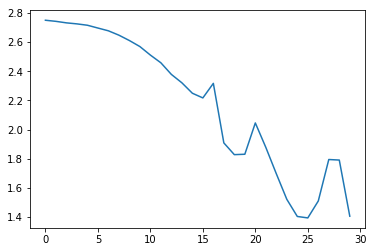

Test Cost: 0.852767625306579 Acuratete: 73.27732773277327


In [255]:
costuri, testCosts, parameters=run1(x_train,y_train,x_test,y_test, hidden_layer_size)

In [258]:
hidden_layer_sizes = {100, 150, 200, 250}
hidden_layer_size = 100
minimum_loss = 100000

Epoca: 1 Train Cost: 4.45293223015354 Acuratete: 10.204
Epoca: 2 Train Cost: 4.5088190476232235 Acuratete: 9.864
Epoca: 3 Train Cost: 4.67276424012913 Acuratete: 9.718
Epoca: 4 Train Cost: 4.17080853015635 Acuratete: 9.936
Epoca: 5 Train Cost: 3.807370520552518 Acuratete: 11.862
Epoca: 6 Train Cost: 3.630298342679908 Acuratete: 11.13
Epoca: 7 Train Cost: 3.5976859060695103 Acuratete: 14.302
Epoca: 8 Train Cost: 3.5684697794286624 Acuratete: 17.556
Epoca: 9 Train Cost: 3.5265501125820555 Acuratete: 23.618
Epoca: 10 Train Cost: 3.4815506653844945 Acuratete: 30.242
Epoca: 11 Train Cost: 3.429553027740053 Acuratete: 39.386
Epoca: 12 Train Cost: 3.375294162324516 Acuratete: 47.44
Epoca: 13 Train Cost: 3.3147899098049214 Acuratete: 54.882
Epoca: 14 Train Cost: 3.2508231736806055 Acuratete: 59.334
Epoca: 15 Train Cost: 3.1803570679782354 Acuratete: 63.252
Epoca: 16 Train Cost: 3.116623708670527 Acuratete: 65.486
Epoca: 17 Train Cost: 3.054031323010138 Acuratete: 68.788
Epoca: 18 Train Cost: 3

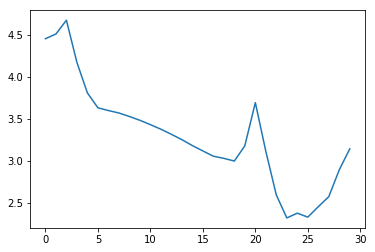

Test Cost: 1.3770783449033748 Acuratete: 55.09550955095509


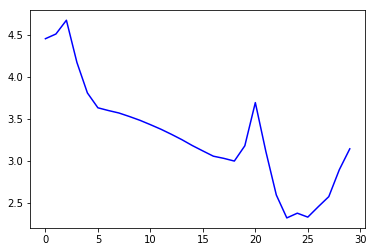

Epoca: 1 Train Cost: 5.653606226470002 Acuratete: 10.346
Epoca: 2 Train Cost: 5.787880576293847 Acuratete: 9.864
Epoca: 3 Train Cost: 6.2355915188814866 Acuratete: 10.35
Epoca: 4 Train Cost: 4.771791393420779 Acuratete: 9.936
Epoca: 5 Train Cost: 3.6998639727290588 Acuratete: 24.188
Epoca: 6 Train Cost: 3.717738188408962 Acuratete: 23.972
Epoca: 7 Train Cost: 3.7502479690957475 Acuratete: 22.374
Epoca: 8 Train Cost: 3.77776885083023 Acuratete: 22.116
Epoca: 9 Train Cost: 3.78891719852145 Acuratete: 24.914
Epoca: 10 Train Cost: 3.785615473679758 Acuratete: 31.476
Epoca: 11 Train Cost: 3.7711869394920448 Acuratete: 38.636
Epoca: 12 Train Cost: 3.7471957062128496 Acuratete: 45.218
Epoca: 13 Train Cost: 3.714032002457661 Acuratete: 51.398
Epoca: 14 Train Cost: 3.67191218218578 Acuratete: 56.134
Epoca: 15 Train Cost: 3.6224811247958812 Acuratete: 59.636
Epoca: 16 Train Cost: 3.5709280171152384 Acuratete: 62.48
Epoca: 17 Train Cost: 3.5255040450942308 Acuratete: 65.08
Epoca: 18 Train Cost: 3

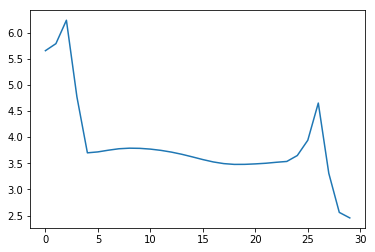

Test Cost: 0.741065106440648 Acuratete: 79.94799479947994


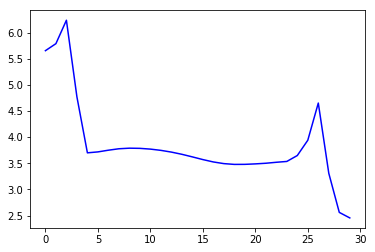

Epoca: 1 Train Cost: 2.8435289772358097 Acuratete: 9.01
Epoca: 2 Train Cost: 2.8365771420057753 Acuratete: 9.864
Epoca: 3 Train Cost: 2.8247905939709623 Acuratete: 13.09
Epoca: 4 Train Cost: 2.8147873400821752 Acuratete: 9.864
Epoca: 5 Train Cost: 2.8033509846877283 Acuratete: 11.314
Epoca: 6 Train Cost: 2.778388985784841 Acuratete: 9.864
Epoca: 7 Train Cost: 2.7568751854886338 Acuratete: 12.124
Epoca: 8 Train Cost: 2.7289716982247807 Acuratete: 10.742
Epoca: 9 Train Cost: 2.692769325758985 Acuratete: 20.628
Epoca: 10 Train Cost: 2.6564182506355514 Acuratete: 18.098
Epoca: 11 Train Cost: 2.6003761593742807 Acuratete: 45.012
Epoca: 12 Train Cost: 2.5516520998056618 Acuratete: 27.928
Epoca: 13 Train Cost: 2.4741375823046723 Acuratete: 59.662
Epoca: 14 Train Cost: 2.414406986235746 Acuratete: 39.61
Epoca: 15 Train Cost: 2.3206246756422635 Acuratete: 64.762
Epoca: 16 Train Cost: 2.2897993681914426 Acuratete: 40.492
Epoca: 17 Train Cost: 2.3248470329240365 Acuratete: 57.216
Epoca: 18 Train 

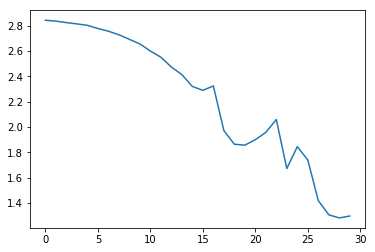

Test Cost: 0.8233148239575945 Acuratete: 74.2974297429743


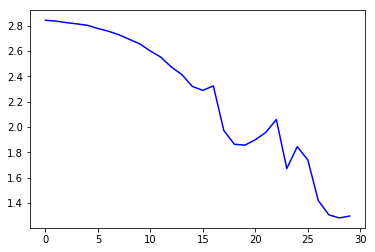

Epoca: 1 Train Cost: 3.5185145979487884 Acuratete: 10.642
Epoca: 2 Train Cost: 3.538766688227154 Acuratete: 9.864
Epoca: 3 Train Cost: 3.5745270429593416 Acuratete: 9.976
Epoca: 4 Train Cost: 3.4567794851277336 Acuratete: 9.864
Epoca: 5 Train Cost: 3.3743654000483914 Acuratete: 9.976
Epoca: 6 Train Cost: 3.1296794636553305 Acuratete: 10.186
Epoca: 7 Train Cost: 3.106965071035871 Acuratete: 11.958
Epoca: 8 Train Cost: 3.0805541076381995 Acuratete: 15.968
Epoca: 9 Train Cost: 3.045521731917642 Acuratete: 20.094
Epoca: 10 Train Cost: 2.997388526555538 Acuratete: 28.314
Epoca: 11 Train Cost: 2.9419414358254863 Acuratete: 35.594
Epoca: 12 Train Cost: 2.877900809925642 Acuratete: 44.602
Epoca: 13 Train Cost: 2.8049848145449556 Acuratete: 52.102
Epoca: 14 Train Cost: 2.7205815476508968 Acuratete: 58.178
Epoca: 15 Train Cost: 2.6299272186376967 Acuratete: 61.578
Epoca: 16 Train Cost: 2.537201403462286 Acuratete: 64.698
Epoca: 17 Train Cost: 2.4584104203450456 Acuratete: 66.286
Epoca: 18 Train 

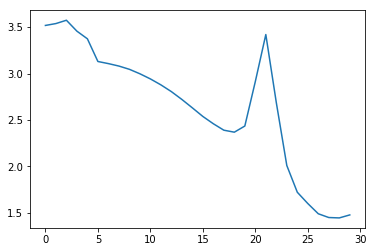

Test Cost: 0.8517987447579574 Acuratete: 70.74707470747074


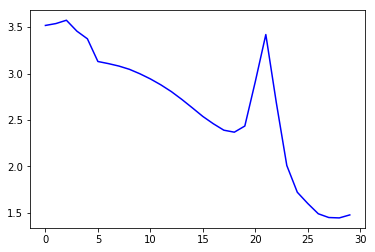

Optimal hidden layer size: 250
Epoca: 1 Train Cost: 5.11183866664276 Acuratete: 9.751829197153286
Epoca: 2 Train Cost: 5.234503432600388 Acuratete: 9.87183119718662
Epoca: 3 Train Cost: 5.744491798642549 Acuratete: 9.615160252670877
Epoca: 4 Train Cost: 4.51115432089105 Acuratete: 9.93016550275838
Epoca: 5 Train Cost: 3.6005993099094313 Acuratete: 21.170352839213987
Epoca: 6 Train Cost: 3.544219528543702 Acuratete: 22.102035033917232
Epoca: 7 Train Cost: 3.534375857642453 Acuratete: 23.58039300655011
Epoca: 8 Train Cost: 3.5392918054300826 Acuratete: 24.6120768679478
Epoca: 9 Train Cost: 3.542583237688614 Acuratete: 26.870447840797347
Epoca: 10 Train Cost: 3.536509970003853 Acuratete: 31.255520925348755
Epoca: 11 Train Cost: 3.5192962404481736 Acuratete: 39.38732312205203
Epoca: 12 Train Cost: 3.4903501302399764 Acuratete: 48.32247204120068
Epoca: 13 Train Cost: 3.449455863324625 Acuratete: 55.049250820847014
Epoca: 14 Train Cost: 3.3969662761620203 Acuratete: 59.302655044250734
Epoca:

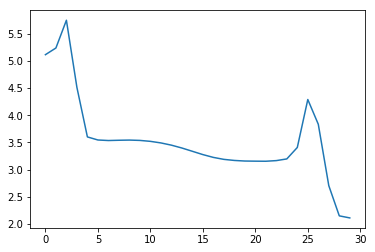

Test Cost: 0.8905572240489708 Acuratete: 75.46754675467547


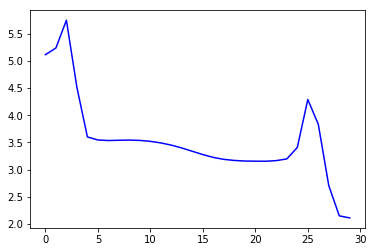

AxisError: axis 1 is out of bounds for array of dimension 1

In [259]:
for layer_size in hidden_layer_sizes:
    costuri, testCost, parameters= run1(X_train_without_validation, y_train_without_validation, X_train_validation, y_train_validation, layer_size)
    if testCost < minimum_loss:
        minimum_loss = testCost
        hidden_layer_size = layer_size
    plt.plot(range(len(costuri)), costuri, color='blue')
    plt.show()
print('Optimal hidden layer size:', hidden_layer_size)

costuri, testCost, parameters= run1(x_train, y_train, x_test, y_test, hidden_layer_size)

plt.plot(range(len(costuri)), costuri, color='blue')
plt.show()

first,second = forward_prop(x_test, parameters[0], parameters[1], parameters[2], parameters[3])
test_accuracy = acurracy(second, y_test)

print('Test accuracy: ', test_accuracy)

In [ ]:
#y_test = one_hot(y_test)
#test = acurracy(second, y_test)
#print(test)